In [1]:
import numpy as np
from keras.datasets import cifar100
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar100.load_data()

In [3]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [4]:
# 查詢檔案維度資訊
print("The shape of training image:",x_img_train.shape)
print("The shape of training label:", y_label_train.shape)
print("The shape of testing image:", x_img_test.shape)
print("The shape of testing image:", y_label_test.shape)

The shape of training image: (50000, 32, 32, 3)
The shape of training label: (50000, 1)
The shape of testing image: (10000, 32, 32, 3)
The shape of testing image: (10000, 1)


In [5]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')                
        title=str(i)          
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

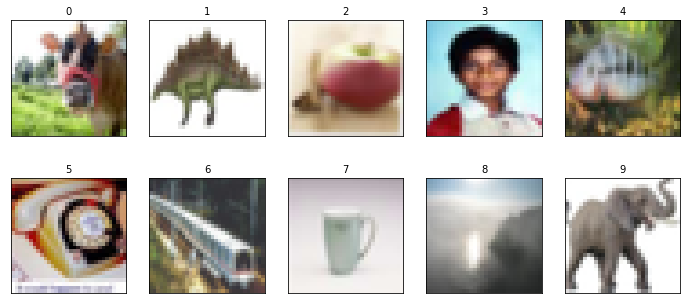

In [6]:
plot_images_labels_prediction(x_img_train,y_label_train,0)

In [7]:
print(x_img_train[0][0][0])
print(x_img_test[0][0][0])
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0
print(x_img_train_normalize[0][0][0])
print(x_img_test_normalize[0][0][0])

[255 255 255]
[199 215 249]
[1. 1. 1.]
[0.78039217 0.84313726 0.9764706 ]


In [8]:
print(y_label_train[:5])
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

[[19]
 [29]
 [ 0]
 [11]
 [ 1]]


In [9]:
print(y_label_train_OneHot.shape)

print(y_label_train_OneHot[:5])

(50000, 100)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0